# EDA OF MARKOV SIMULATION PROJECT

In [35]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv("./data/simulation_data_clean.csv", parse_dates=["timestamp"], index_col=0)
df.tail()


,customer_no,timestamp,location
61371,51509,2019-09-06 21:50:00,drinks
61372,51509,2019-09-06 21:51:00,checkout
61373,51510,2019-09-06 21:49:00,entrance
61374,51510,2019-09-06 21:50:00,spices
61375,51510,2019-09-06 21:51:00,checkout


## Calculate the total number of customers in each section

In [87]:
df.groupby("location").count()

,customer_no,timestamp
location,,
checkout,7445,7445
dairy,17774,17774
drinks,9726,9726
entrance,7445,7445
fruit,12708,12708
spices,6278,6278


## Calculate the total number of customers in each section and checkout over time

In [88]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['minute'] = pd.to_datetime(df['timestamp']).dt.minute
df

,customer_no,timestamp,location,hour,minute
0,10001,2019-09-02 07:02:00,entrance,7,2
1,10001,2019-09-02 07:03:00,dairy,7,3
2,10001,2019-09-02 07:04:00,dairy,7,4
3,10001,2019-09-02 07:05:00,checkout,7,5
4,10002,2019-09-02 07:02:00,entrance,7,2
...,...,...,...,...,...
61371,51509,2019-09-06 21:50:00,drinks,21,50
61372,51509,2019-09-06 21:51:00,checkout,21,51
61373,51510,2019-09-06 21:49:00,entrance,21,49
61374,51510,2019-09-06 21:50:00,spices,21,50


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df_customer_section = df.groupby("location")["customer_no"].nunique()
df_customer_section

location
checkout    7445
dairy       3818
drinks      3214
entrance    7445
fruit       4284
spices      2938
Name: customer_no, dtype: int64

In [91]:
# Group the data by hours and sections, count the number of unique customers in each group
grouped_data = df.groupby(['hour', 'location'])['customer_no'].nunique().reset_index()
grouped_data


,hour,location,customer_no
0,6,entrance,10
1,7,checkout,454
2,7,dairy,235
3,7,drinks,234
4,7,entrance,491
...,...,...,...
86,21,dairy,145
87,21,drinks,156
88,21,entrance,274
89,21,fruit,157


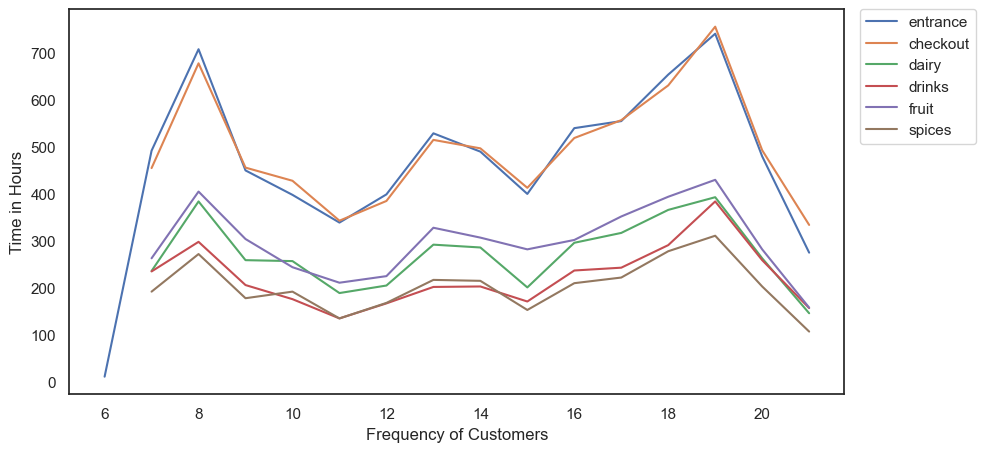

In [96]:
#sns.set(style="darkgrid")
sns.set_theme(style='white')
plt.figure(figsize=(10, 5)) 
sns.lineplot(data=grouped_data, x='hour', y="customer_no", hue="location")
plt.xlabel("Frequency of Customers")
plt.ylabel("Time in Hours")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


## Calculate the time each customer spent in the market

In [97]:
df = df.sort_values(by=['customer_no', 'timestamp'])
df

,customer_no,timestamp,location,hour,minute
0,10001,2019-09-02 07:02:00,entrance,7,2
1,10001,2019-09-02 07:03:00,dairy,7,3
2,10001,2019-09-02 07:04:00,dairy,7,4
3,10001,2019-09-02 07:05:00,checkout,7,5
4,10002,2019-09-02 07:02:00,entrance,7,2
...,...,...,...,...,...
61371,51509,2019-09-06 21:50:00,drinks,21,50
61372,51509,2019-09-06 21:51:00,checkout,21,51
61373,51510,2019-09-06 21:49:00,entrance,21,49
61374,51510,2019-09-06 21:50:00,spices,21,50


In [98]:
df.groupby('customer_no')['minute'].diff()


0        NaN
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
61371    1.0
61372    1.0
61373    NaN
61374    1.0
61375    1.0
Name: minute, Length: 61376, dtype: float64

In [99]:
# Calculate the total number of customers in the supermarket over time.
total_customers = df.groupby('hour')['customer_no'].nunique().reset_index()
total_customers

,hour,customer_no
0,6,10
1,7,501
2,8,754
3,9,526
4,10,468
5,11,379
6,12,435
7,13,579
8,14,554
9,15,457


Text(0, 0.5, 'Time in Hours')

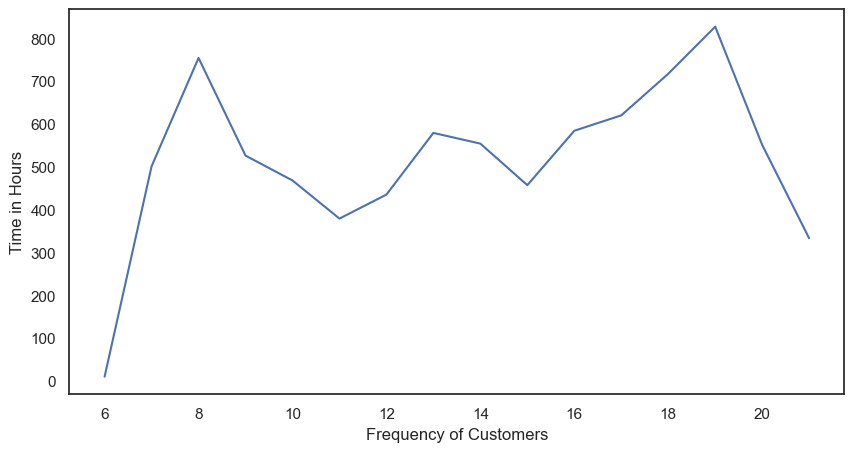

In [101]:
sns.set_theme(style='white')
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_customers, x='hour', y="customer_no")
plt.xlabel("Frequency of Customers")
plt.ylabel("Time in Hours")
#plt.tight_layout()

## Plot the distribution of customers of their first visited section versus following sections 